In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])
df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

In [3]:
df

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat
5,1300,0,0,1,2,Skinny
6,3000,1,0,1,1,Normal
7,4000,2,2,2,0,Fat
8,2600,0,2,0,0,Normal
9,3000,1,2,1,1,Fat


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
X=df[['calory','breakfast','lunch','dinner','exercise']]
Y=df[['body_shape']]

,body_shape
0,Skinny
1,Normal
2,Fat
3,Skinny
4,Fat
5,Skinny
6,Normal
7,Fat
8,Normal
9,Fat


In [7]:
x_std=StandardScaler().fit_transform(X)

In [8]:
x_std  # <- 표준화된 X데이터

array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

In [9]:
import numpy as np

In [11]:
f=x_std.T
cov_matrix=np.cov(f)
print(cov_matrix)

[[ 1.11111111  0.88379717  0.76782385  0.89376551 -0.93179808]
 [ 0.88379717  1.11111111  0.49362406  0.81967902 -0.71721914]
 [ 0.76782385  0.49362406  1.11111111  0.40056715 -0.76471911]
 [ 0.89376551  0.81967902  0.40056715  1.11111111 -0.63492063]
 [-0.93179808 -0.71721914 -0.76471911 -0.63492063  1.11111111]]


In [ ]:
np.linalg # <- linear algebra의 약자, 페키지 중에 eig가 eigen value!

In [12]:
eig_vals, eig_vecs=np.linalg.eig(cov_matrix)

In [17]:
print("고유값: \n %s" % eig_vals)

고유값: 
 [4.0657343  0.8387565  0.07629538 0.27758568 0.2971837 ]


In [18]:
print("고유벡터: \n %s" % eig_vecs)

고유벡터: 
 [[ 0.508005    0.0169937  -0.84711404  0.11637853  0.10244985]
 [ 0.44660335  0.36890361  0.12808055 -0.63112016 -0.49973822]
 [ 0.38377913 -0.70804084  0.20681005 -0.40305226  0.38232213]
 [ 0.42845209  0.53194699  0.3694462   0.22228235  0.58954327]
 [-0.46002038  0.2816592  -0.29450345 -0.61341895  0.49601841]]


In [19]:
eig_vals[0]/sum(eig_vals) # 73% 데이터의 특성을 담는다.
# 5차원 -> 1차원(eig_vals[0])축으로 차원축소하면 73% 데이터의 특성을 살린다.

0.7318321731427544

In [30]:
#첫번째 고유벡터에 정사영
projected_x=x_std.dot(eig_vecs.T[0])

In [32]:
projected_x

array([-2.22600943, -0.0181432 ,  1.76296611, -2.73542407,  3.02711544,
       -2.14702579, -0.37142473,  2.59239883, -0.39347815,  0.50902498])

In [33]:
res=pd.DataFrame(projected_x,columns=['PC1'])
res
res['yaxis']=0.0
res['label']=Y
res
# 수동으로 정사영을 함

,PC1,yaxis,label
0,-2.226009,0.0,Skinny
1,-0.018143,0.0,Normal
2,1.762966,0.0,Fat
3,-2.735424,0.0,Skinny
4,3.027115,0.0,Fat
5,-2.147026,0.0,Skinny
6,-0.371425,0.0,Normal
7,2.592399,0.0,Fat
8,-0.393478,0.0,Normal
9,0.509025,0.0,Fat


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1, 'PCA result')

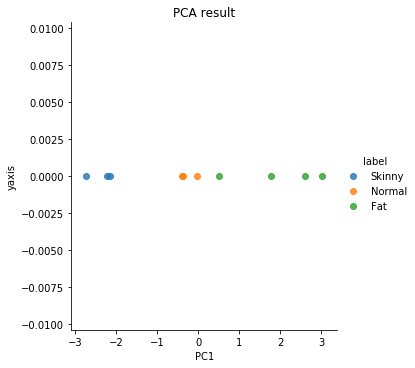

In [38]:
sns.lmplot('PC1','yaxis',
           data=res,hue='label',
          fit_reg=False) # <- linear model plot할 때
plt.title('PCA result')